# JAMMU & KASHMIR  

In [195]:
import pandas as pd

# 1. Load the three Jammu and Kashmir datasets
df_jk_enrolment = pd.read_csv('/content/Jammu&Kashmir Enrolment Dataset.csv')
df_jk_demographic = pd.read_csv('/content/Jammu&Kashmir Demographic Dataset.csv')
df_jk_biometric = pd.read_csv('/content/Jammu&Kashmir Biometric Dataset.csv')

# 2. Convert the 'date' column in each of these three DataFrames to datetime objects
df_jk_enrolment['date'] = pd.to_datetime(df_jk_enrolment['date'], format='%d-%m-%Y')
df_jk_demographic['date'] = pd.to_datetime(df_jk_demographic['date'], format='%d-%m-%Y')
df_jk_biometric['date'] = pd.to_datetime(df_jk_biometric['date'], format='%d-%m-%Y')

# 3. Perform an outer merge of df_jk_enrolment and df_jk_demographic
merged_jk_df_temp = pd.merge(df_jk_enrolment, df_jk_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')

In [196]:
# 4. Merge merged_jk_df_temp with df_jk_biometric to create the final merged DataFrame
df_merged_jk = pd.merge(merged_jk_df_temp, df_jk_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# 5. Identify all numerical columns in df_merged_jk.
numeric_cols = df_merged_jk.select_dtypes(include=['number']).columns

# 6. Fill any NaN values in these identified numerical columns of df_merged_jk with 0.
df_merged_jk[numeric_cols] = df_merged_jk[numeric_cols].fillna(0)

# 7. Print the head, info, and descriptive statistics for verification
print("Merged Jammu and Kashmir DataFrame (df_merged_jk) head:")
print(df_merged_jk.head())
print("\nMerged Jammu and Kashmir DataFrame (df_merged_jk) info:")
print(df_merged_jk.info())
print("\nMerged Jammu and Kashmir DataFrame (df_merged_jk) describe:")
print(df_merged_jk.describe())

Merged Jammu and Kashmir DataFrame (df_merged_jk) head:
        date              state  district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Jammu and Kashmir  Anantnag   192101      0.0       0.0   
1 2025-03-01  Jammu and Kashmir  Anantnag   192102      0.0       0.0   
2 2025-03-01  Jammu and Kashmir  Anantnag   192102      0.0       0.0   
3 2025-03-01  Jammu and Kashmir  Anantnag   192124      0.0       0.0   
4 2025-03-01  Jammu and Kashmir  Anantnag   192125      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0             0.0          101.0         835.0         295.0        415.0  
1             0.0            0.0           0.0          16.0         28.0  
2             0.0            0.0           0.0          16.0         28.0  
3             0.0            0.0           0.0         254.0        424.0  
4             0.0            0.0           0.0          95.0        104.0  

Merged Jammu and Kashmir DataFrame (df_merged_jk

In [215]:
import numpy as np

# Ensure df_merged_jk is correctly prepared before proceeding
# (Assuming df_jk_enrolment, df_jk_demographic, df_jk_biometric are loaded and dates converted)
merged_jk_df_temp = pd.merge(df_jk_enrolment, df_jk_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged_jk = pd.merge(merged_jk_df_temp, df_jk_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_merged_jk.select_dtypes(include=['number']).columns

# Fill any NaN values in these identified numerical columns of df_merged_jk with 0.
df_merged_jk[numeric_cols] = df_merged_jk[numeric_cols].fillna(0)

df_jk = df_merged_jk[df_merged_jk['state'] == 'Jammu and Kashmir'].copy()
df_jk['year'] = df_jk['date'].dt.year
df_jk['month'] = df_jk['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_jk_agg = df_jk.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

# 1. Create 'totalenrolments' column
df_jk_agg['totalenrolments'] = df_jk_agg['age_0_5'] + df_jk_agg['age_5_17'] + df_jk_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_jk_agg['childenrolments'] = df_jk_agg['age_0_5'] + df_jk_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_jk_agg['totaldemoupdates'] = df_jk_agg['demo_age_5_17'] + df_jk_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_jk_agg['totalbioupdates'] = df_jk_agg['bio_age_5_17'] + df_jk_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_jk_agg['CES'] = np.where(
    df_jk_agg['totalenrolments'] == 0,
    0,
    df_jk_agg['childenrolments'] / df_jk_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_jk_agg['DUR'] = np.where(
    df_jk_agg['totalenrolments'] == 0,
    0,
    df_jk_agg['totaldemoupdates'] / df_jk_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_jk_agg['BUR'] = np.where(
    df_jk_agg['totalenrolments'] == 0,
    0,
    df_jk_agg['totalbioupdates'] / df_jk_agg['totalenrolments']
)

In [214]:
# Min-max normalization function
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization
df_jk_agg['Enorm'] = df_jk_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)
df_jk_agg['Dnorm'] = df_jk_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)
df_jk_agg['Bnorm'] = df_jk_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate stdnorm and ALBI
df_jk_agg['stdnorm'] = (df_jk_agg['Enorm'] + df_jk_agg['Dnorm'] + df_jk_agg['Bnorm']) / 3
df_jk_agg['ALBI'] = 1 - df_jk_agg['stdnorm']
df_jk_agg['ALBI'] = df_jk_agg['ALBI'].clip(lower=0, upper=1)

# Calculate risk components and riskscore
df_jk_agg['Enormrisk'] = 1 - df_jk_agg['Enorm']
df_jk_agg['CESrisknorm'] = 1 - df_jk_agg['CES']
df_jk_agg['DURrisknorm'] = 1 - df_jk_agg['DUR']
df_jk_agg['BURrisknorm'] = 1 - df_jk_agg['BUR']
df_jk_agg['ALBIrisknorm'] = 1 - df_jk_agg['ALBI']

df_jk_agg['riskscore'] = (
    df_jk_agg['Enormrisk'] +
    df_jk_agg['CESrisknorm'] +
    df_jk_agg['DURrisknorm'] +
    df_jk_agg['BURrisknorm'] +
    df_jk_agg['ALBIrisknorm']
) / 5 * 100

print("Aggregated DataFrame (df_jk_agg) head with all metrics:")
print(df_jk_agg.head())

Aggregated DataFrame (df_jk_agg) head with all metrics:
   year  month              state   district  age_0_5  age_5_17  \
0  2025      3  Jammu and Kashmir   Anantnag      0.0       0.0   
1  2025      3  Jammu and Kashmir     Badgam      0.0       0.0   
2  2025      3  Jammu and Kashmir  Bandipore      0.0       0.0   
3  2025      3  Jammu and Kashmir   Baramula      0.0       0.0   
4  2025      3  Jammu and Kashmir     Budgam      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0          417.0        2782.0        2164.0  ...  0.239856   
1             0.0          288.0        3555.0         302.0  ...  0.064821   
2             0.0          333.0        1901.0         556.0  ...  0.072172   
3             0.0         1200.0        8391.0        4037.0  ...  0.507221   
4             0.0         1531.0        2692.0        2063.0  ...  0.139787   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURris

In [198]:
# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_jk_agg['DUR'] = np.where(
    df_jk_agg['totalenrolments'] == 0,
    0,
    df_jk_agg['totaldemoupdates'] / df_jk_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_jk_agg['BUR'] = np.where(
    df_jk_agg['totalenrolments'] == 0,
    0,
    df_jk_agg['totalbioupdates'] / df_jk_agg['totalenrolments']
)


print("Shape of df_jk:", df_jk.shape)
print("\nFirst 5 rows of df_jk with new 'year' and 'month' columns:")
print(df_jk.head())
print("\nAggregated DataFrame (df_jk_agg) head:")
print(df_jk_agg.head())
print("\nAggregated DataFrame (df_jk_agg) info:")
print(df_jk_agg.info())
print("\nAggregated DataFrame (df_jk_agg) describe:")
print(df_jk_agg.describe())

Shape of df_jk: (59212, 13)

First 5 rows of df_jk with new 'year' and 'month' columns:
        date              state  district  pincode  age_0_5  age_5_17  \
0 2025-03-01  Jammu and Kashmir  Anantnag   192101      0.0       0.0   
1 2025-03-01  Jammu and Kashmir  Anantnag   192102      0.0       0.0   
2 2025-03-01  Jammu and Kashmir  Anantnag   192102      0.0       0.0   
3 2025-03-01  Jammu and Kashmir  Anantnag   192124      0.0       0.0   
4 2025-03-01  Jammu and Kashmir  Anantnag   192125      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  \
0             0.0          101.0         835.0         295.0        415.0   
1             0.0            0.0           0.0          16.0         28.0   
2             0.0            0.0           0.0          16.0         28.0   
3             0.0            0.0           0.0         254.0        424.0   
4             0.0            0.0           0.0          95.0        104.0   

   year  m

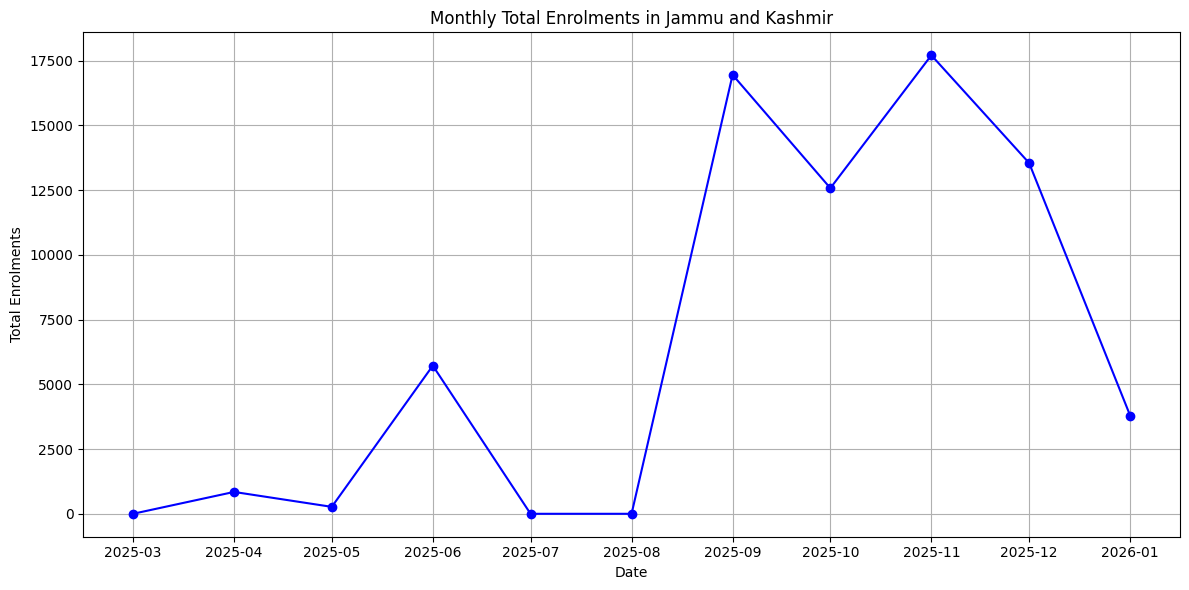

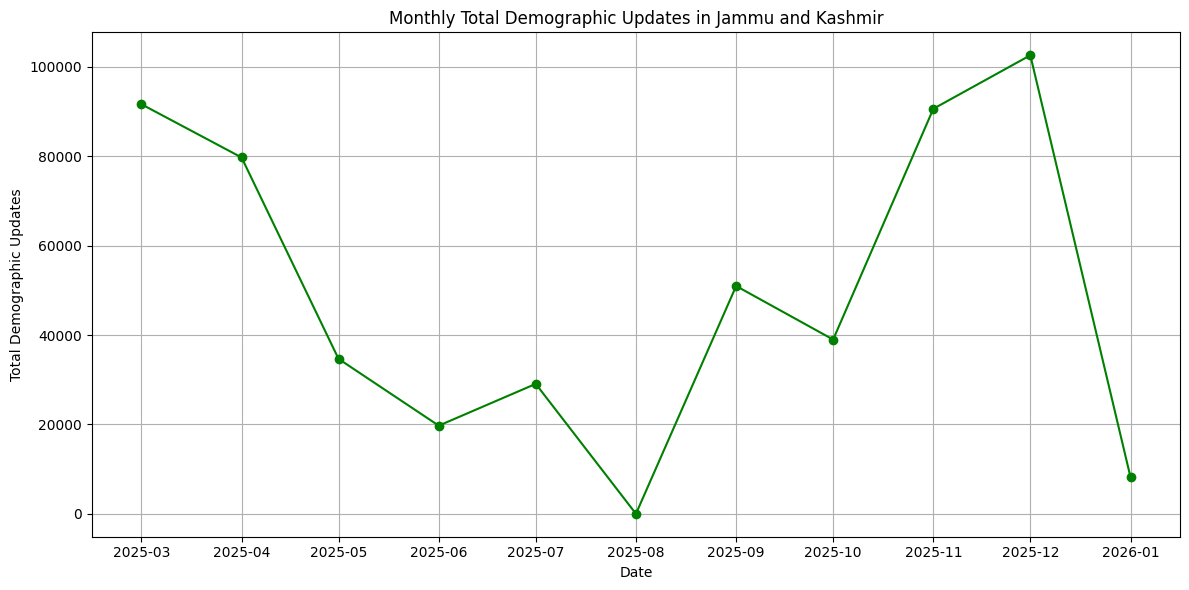

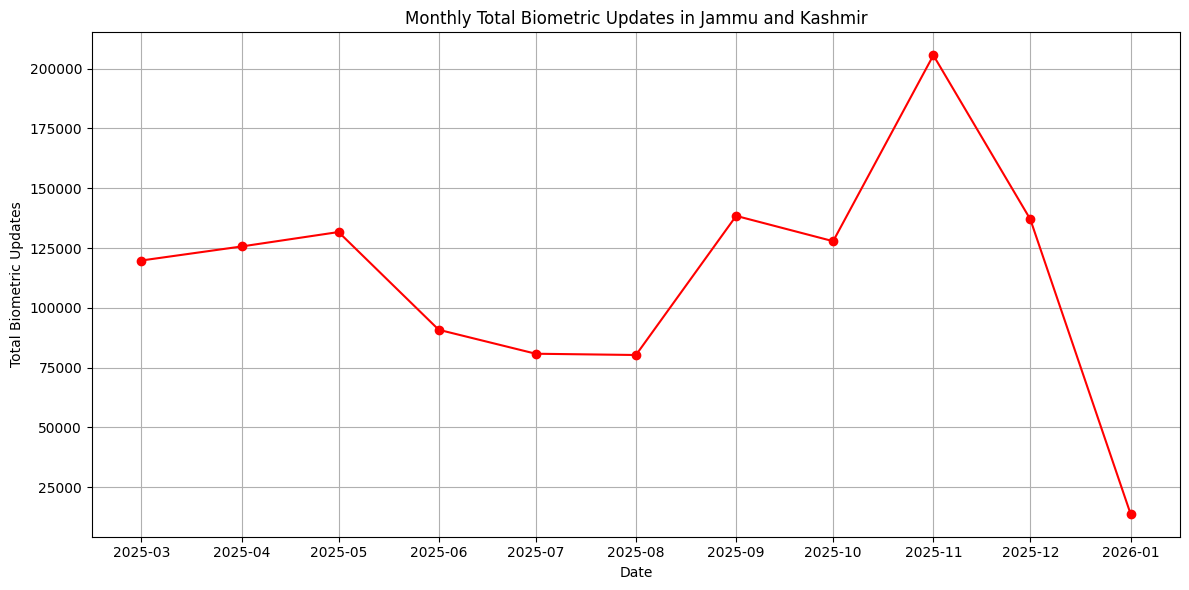

Monthly trend plots generated successfully.


In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

df_jk_monthly_trends = df_jk_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_jk_monthly_trends['date'] = pd.to_datetime(df_jk_monthly_trends['year'].astype(str) + '-' + df_jk_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_jk_monthly_trends = df_jk_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_jk_monthly_trends['date'], df_jk_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Jammu and Kashmir')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_jk_monthly_trends['date'], df_jk_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Jammu and Kashmir')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_jk_monthly_trends['date'], df_jk_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Jammu and Kashmir')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully.")

**Univariate Analysis**

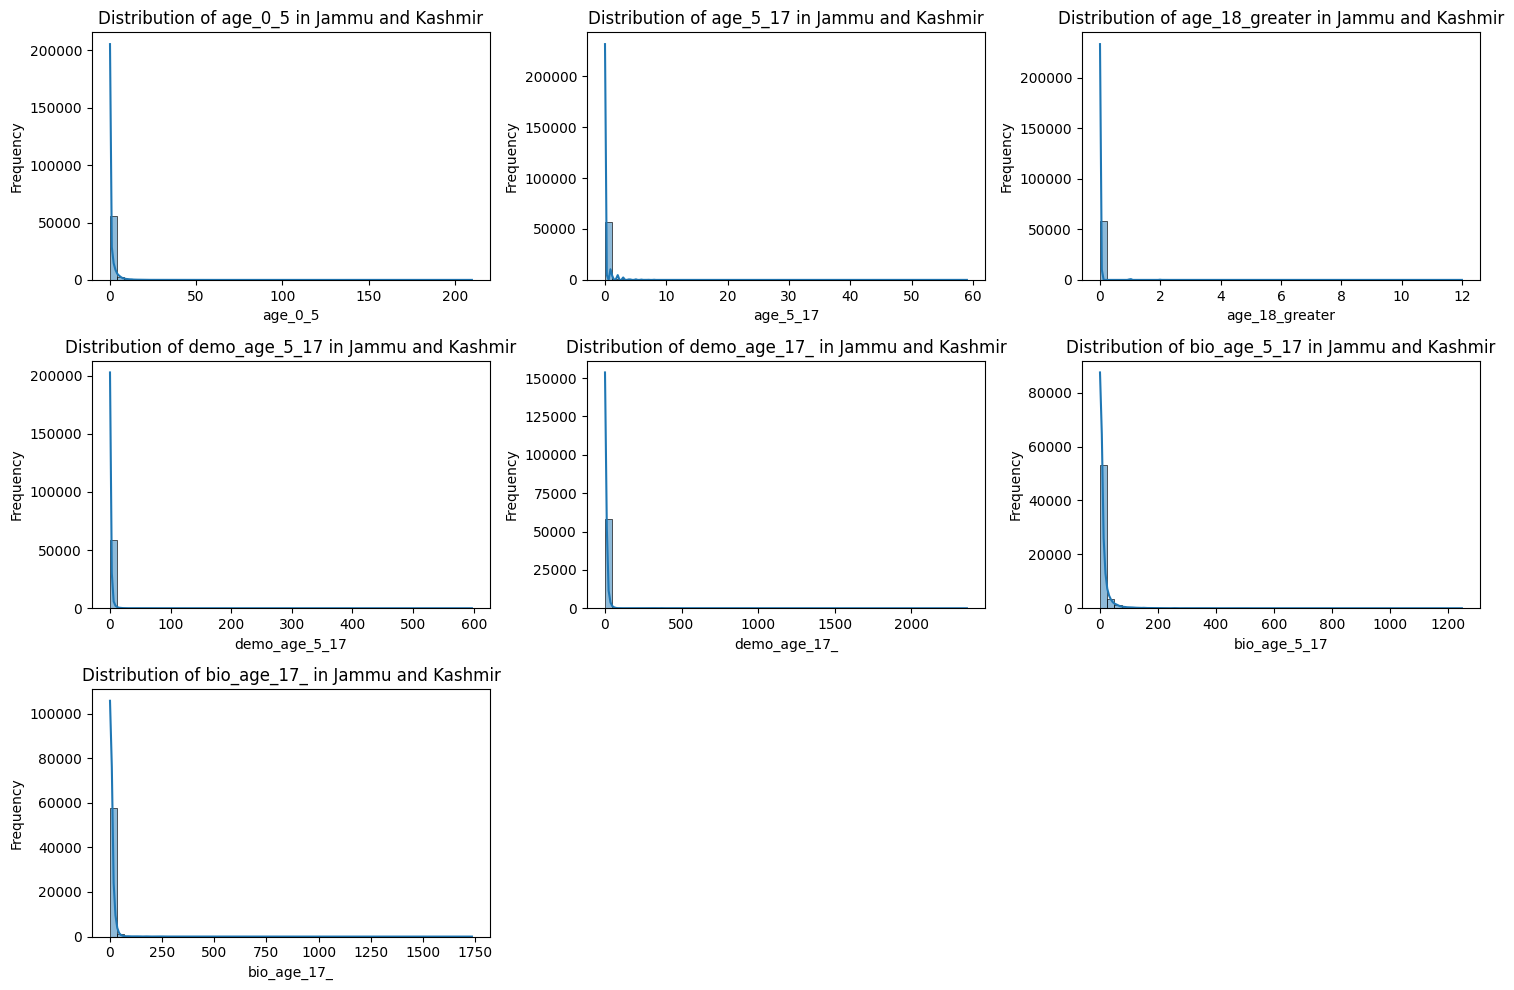

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.histplot(df_merged_jk[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Jammu and Kashmir')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

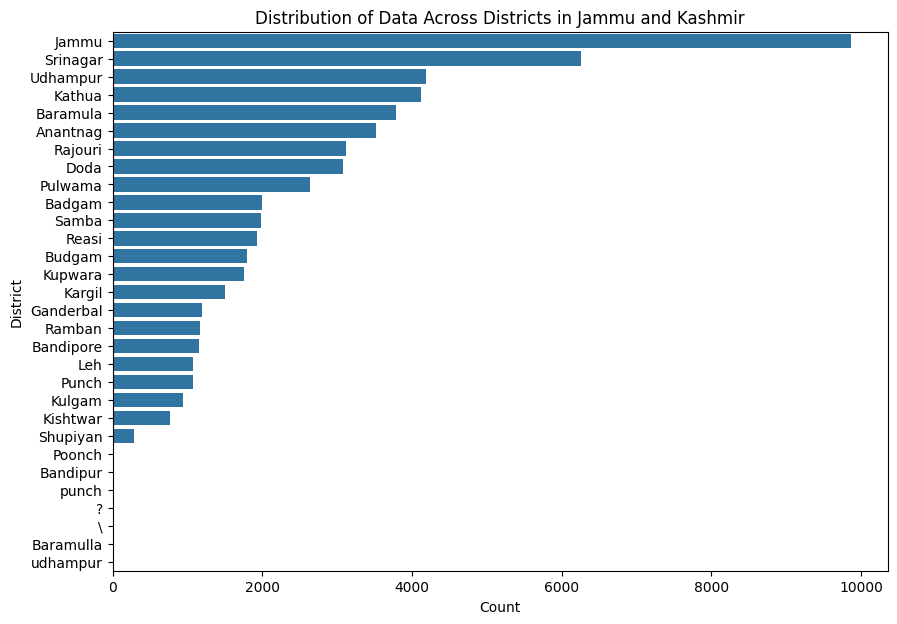

Histograms for numerical age-related columns and count plot for 'district' displayed for Jammu and Kashmir.


In [201]:
plt.figure(figsize=(10, 7))
sns.countplot(data=df_merged_jk, y='district', order=df_merged_jk['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Jammu and Kashmir')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Histograms for numerical age-related columns and count plot for 'district' displayed for Jammu and Kashmir.")

**Bivariate and Trivariate Analysis**

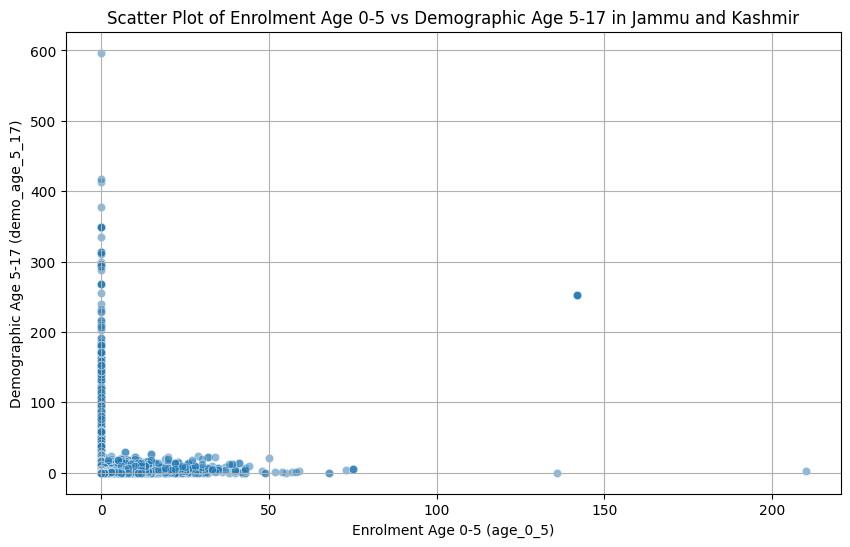

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Jammu and Kashmir.


In [202]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_jk, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 in Jammu and Kashmir')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Jammu and Kashmir.")

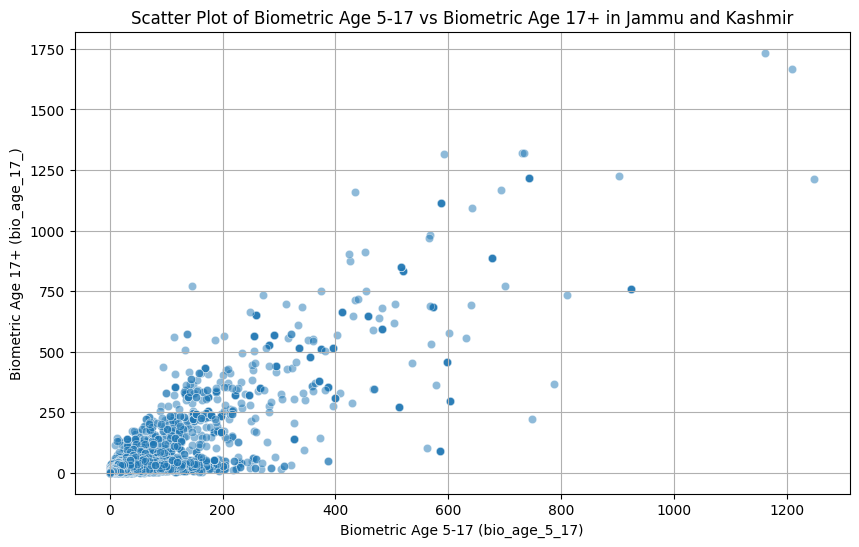

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Jammu and Kashmir.


In [203]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_jk, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ in Jammu and Kashmir')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Jammu and Kashmir.")

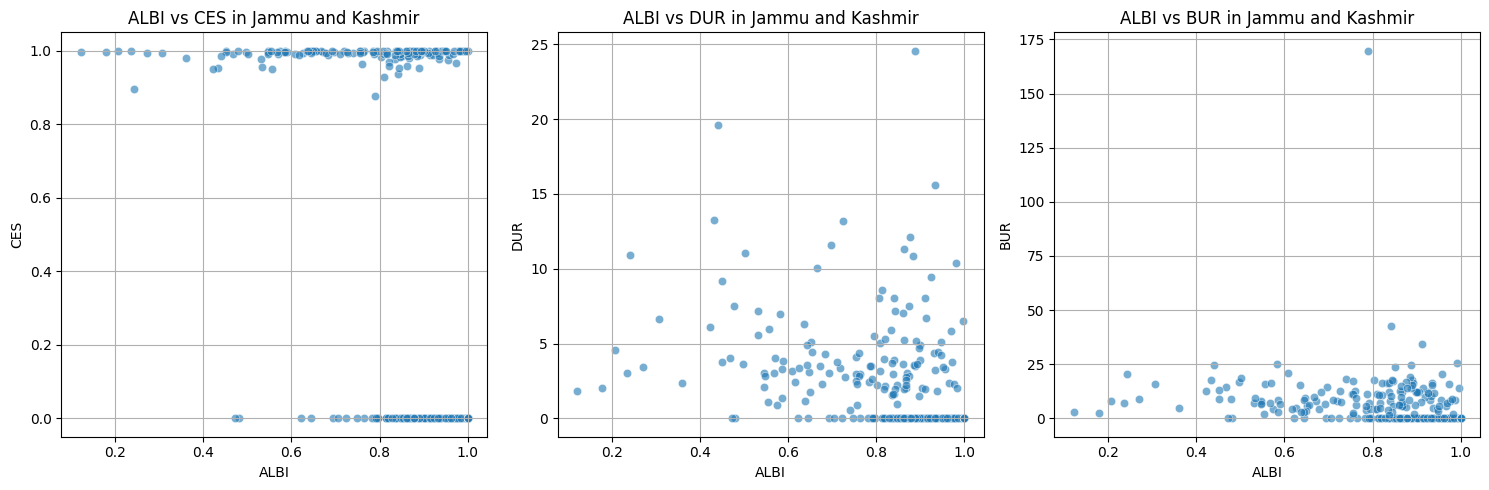

In [204]:
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_jk_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Jammu and Kashmir')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

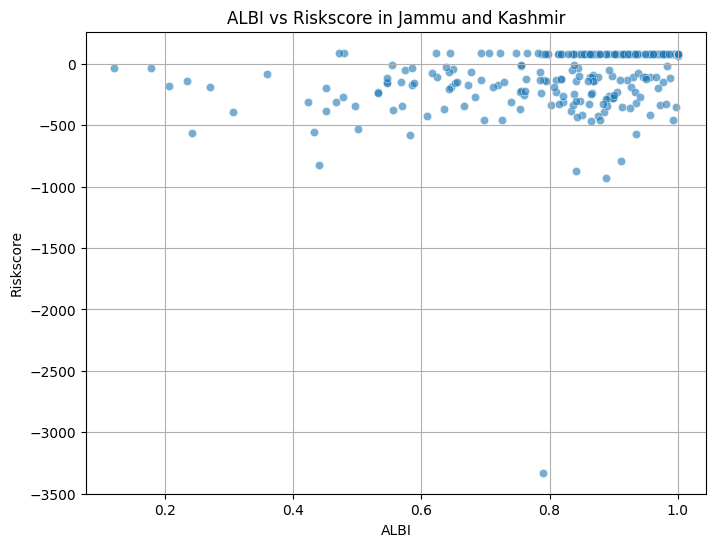

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Jammu and Kashmir.


In [205]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_jk_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Jammu and Kashmir')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR, and Riskscore displayed for Jammu and Kashmir.")

In [206]:
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_jk = df_merged_jk[numerical_age_cols].corr()

print("Correlation Matrix for Jammu and Kashmir:")
print(correlation_matrix_jk)

Correlation Matrix for Jammu and Kashmir:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.597643        0.250507       0.101216   
age_5_17        0.597643  1.000000        0.286479       0.116051   
age_18_greater  0.250507  0.286479        1.000000       0.080652   
demo_age_5_17   0.101216  0.116051        0.080652       1.000000   
demo_age_17_    0.091189  0.090551        0.064823       0.909258   
bio_age_5_17    0.147416  0.155709        0.094844       0.556723   
bio_age_17_     0.121837  0.146770        0.125795       0.564583   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.091189      0.147416     0.121837  
age_5_17            0.090551      0.155709     0.146770  
age_18_greater      0.064823      0.094844     0.125795  
demo_age_5_17       0.909258      0.556723     0.564583  
demo_age_17_        1.000000      0.533951     0.607676  
bio_age_5_17        0.533951      1.000000     0.832578  

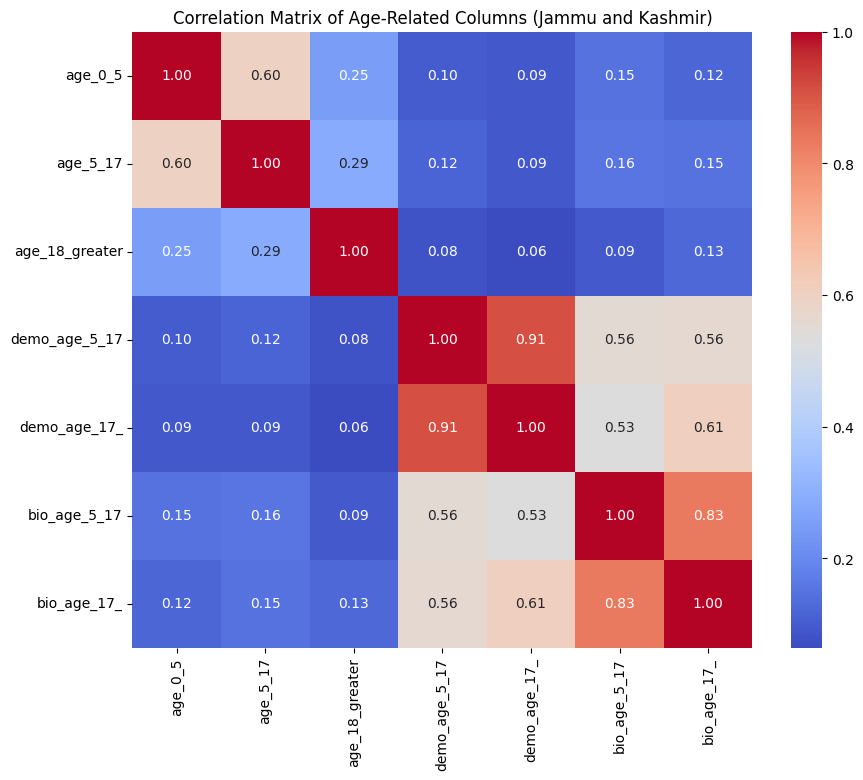

Correlation matrix heatmap for age-related columns displayed for Jammu and Kashmir.


In [207]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_jk, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Jammu and Kashmir)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Jammu and Kashmir.")

In [208]:
age_cols_to_group = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
df_jk_district_mean = df_merged_jk.groupby('district')[age_cols_to_group].mean().reset_index()

print("District-wise average age-related data for Jammu and Kashmir:")
print(df_jk_district_mean.head())
print(df_jk_district_mean.info())

df_jk_district_mean['total_avg_age'] = df_jk_district_mean[age_cols_to_group].sum(axis=1)
df_jk_district_mean_top10 = df_jk_district_mean.nlargest(10, 'total_avg_age')

df_jk_district_mean_melted = df_jk_district_mean_top10.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group,
    var_name='Age Group',
    value_name='Average Count'
)

District-wise average age-related data for Jammu and Kashmir:
    district   age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0          ?  0.000000  0.000000        0.000000       0.000000      0.000000   
1   Anantnag  1.261722  0.158284        0.011367       2.146348     12.024155   
2     Badgam  1.215000  0.154000        0.000500       0.550500      6.896000   
3  Bandipore  1.583333  0.442708        0.053819       2.037326     10.233507   
4   Bandipur  0.000000  0.000000        0.000000       0.000000      0.666667   

   bio_age_5_17  bio_age_17_  
0      0.000000     1.000000  
1     13.339017     9.866439  
2      3.887500     7.390000  
3     12.522569     9.282986  
4      0.000000     1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   district        30 non-null     object 
 1   age_0_5         30 non-

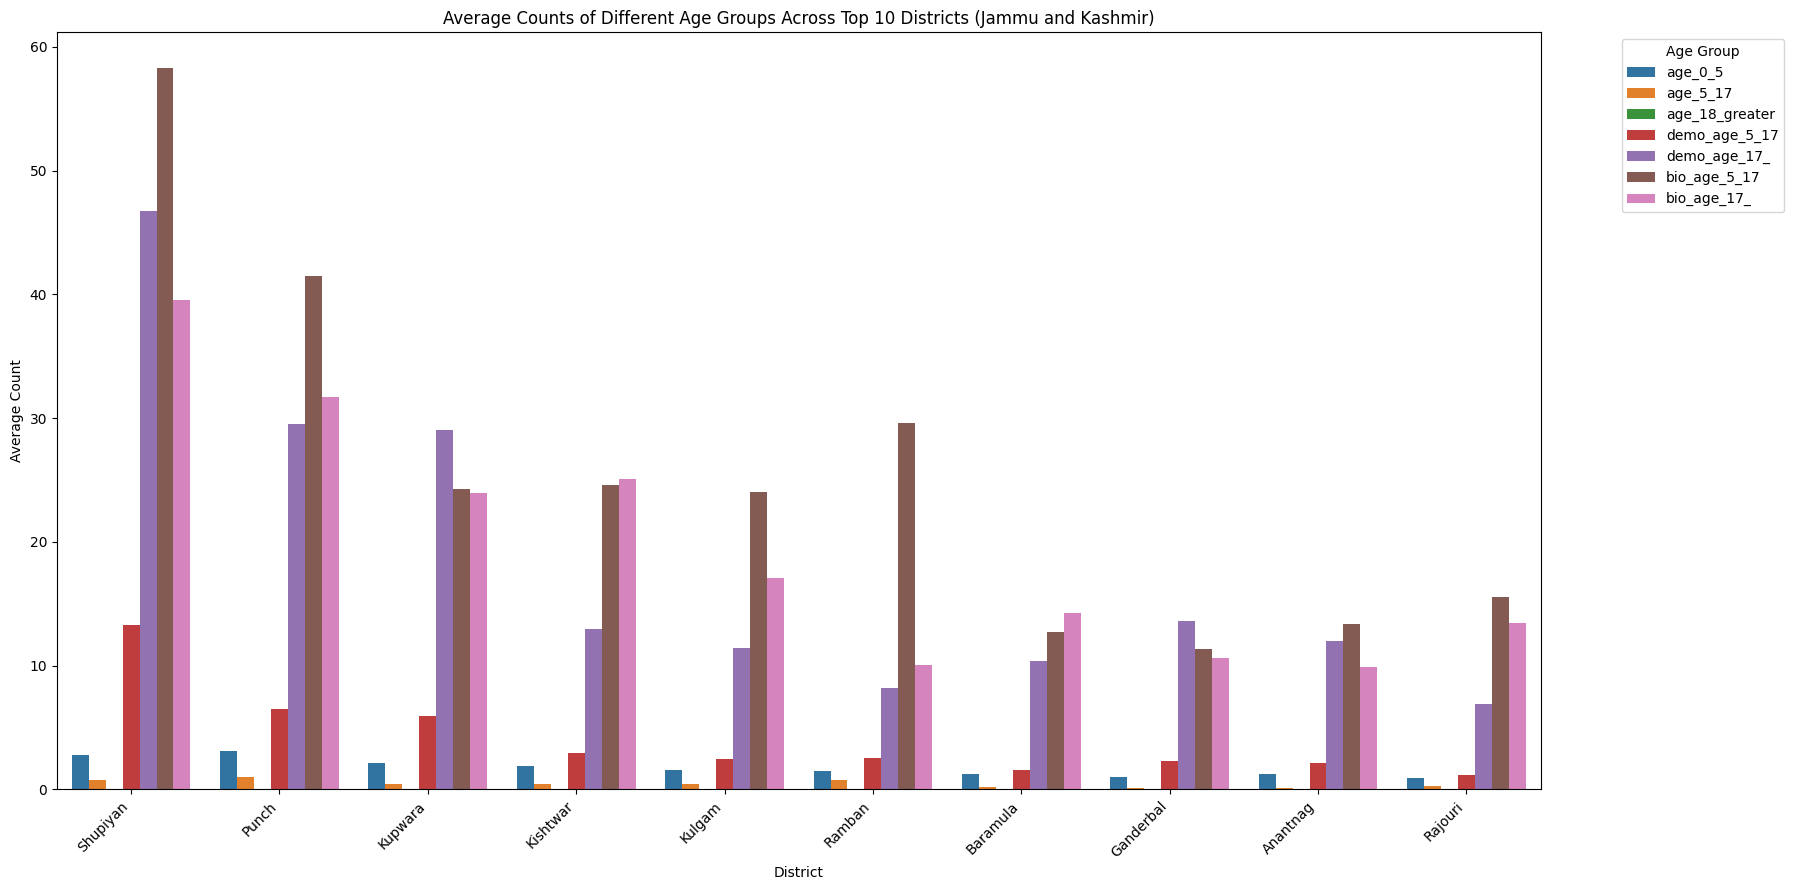

Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Jammu and Kashmir, highlighting which districts have higher overall activity and the relative contribution of each age group.


In [209]:
plt.figure(figsize=(18, 9))
sns.barplot(data=df_jk_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title('Average Counts of Different Age Groups Across Top 10 Districts (Jammu and Kashmir)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart shows the distribution of average enrolment, demographic, and biometric counts across the top 10 districts in Jammu and Kashmir, highlighting which districts have higher overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Jammu and Kashmir:
        date  age_0_5  age_5_17  age_18_greater  demo_age_5_17  demo_age_17_  \
0 2025-03-01      0.0       0.0             0.0        12603.0       79038.0   
1 2025-04-01    568.0     236.0            40.0        13743.0       65982.0   
2 2025-05-01    191.0      55.0            22.0         6500.0       28162.0   
3 2025-05-20      0.0       0.0             0.0            0.0           0.0   
4 2025-05-21      0.0       0.0             0.0            0.0           0.0   

   bio_age_5_17  bio_age_17_  
0       44352.0      75427.0  
1       50976.0      74673.0  
2       45869.0      48553.0  
3        1481.0       1978.0  
4        1734.0       1895.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            231 non-null   

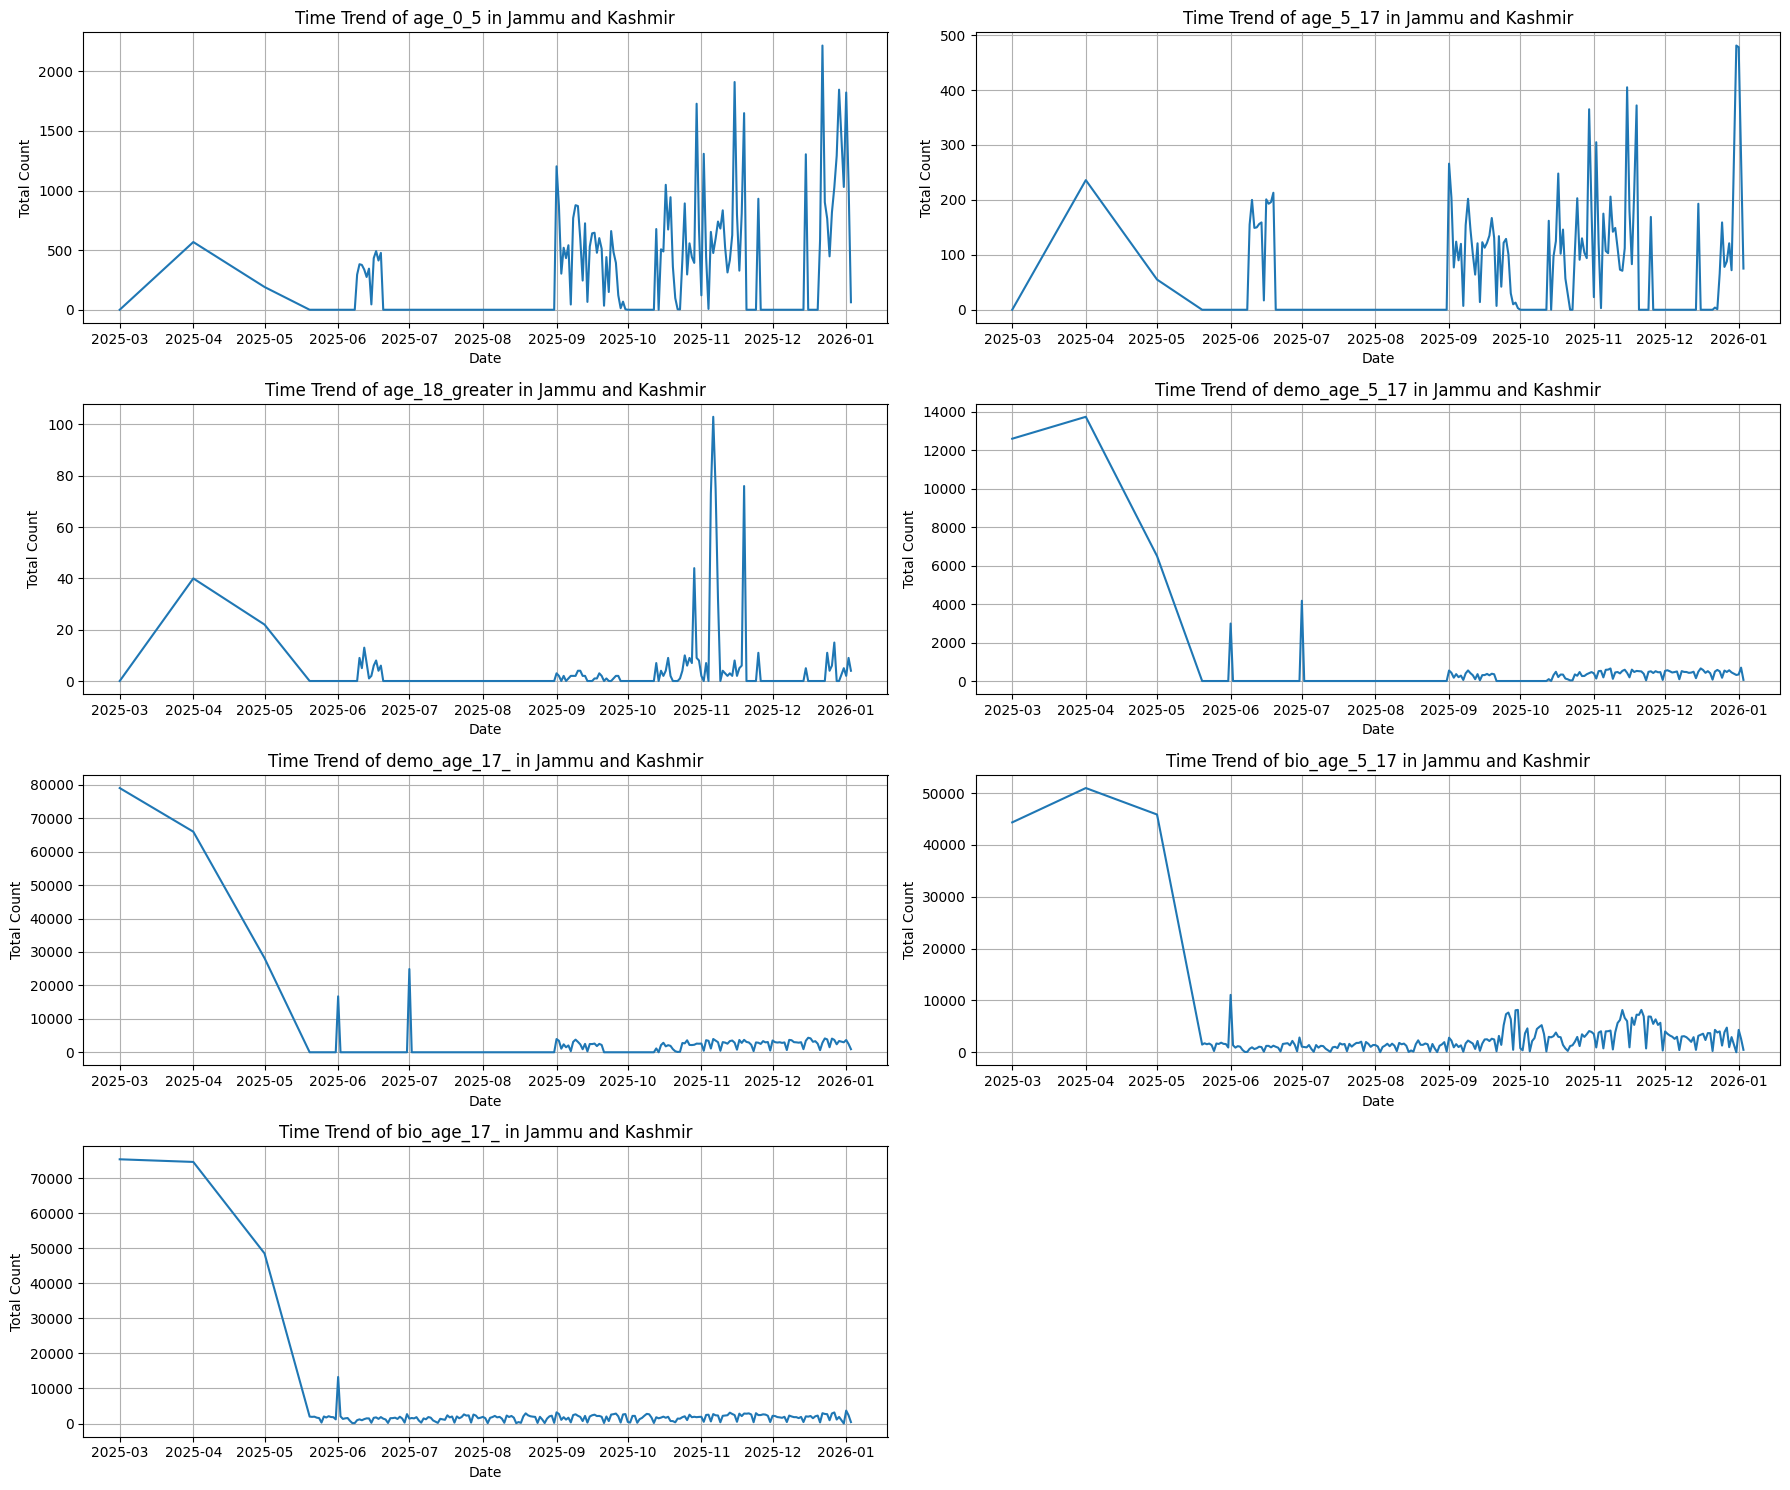

Insight: Line charts for each age-related column over time in Jammu and Kashmir provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [210]:
df_time_trend = df_merged_jk.groupby('date')[age_cols_to_group].sum().reset_index()

print("Time-series aggregated data (sum of age-related columns per date) for Jammu and Kashmir:")
print(df_time_trend.head())
print(df_time_trend.info())
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Jammu and Kashmir')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Jammu and Kashmir provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

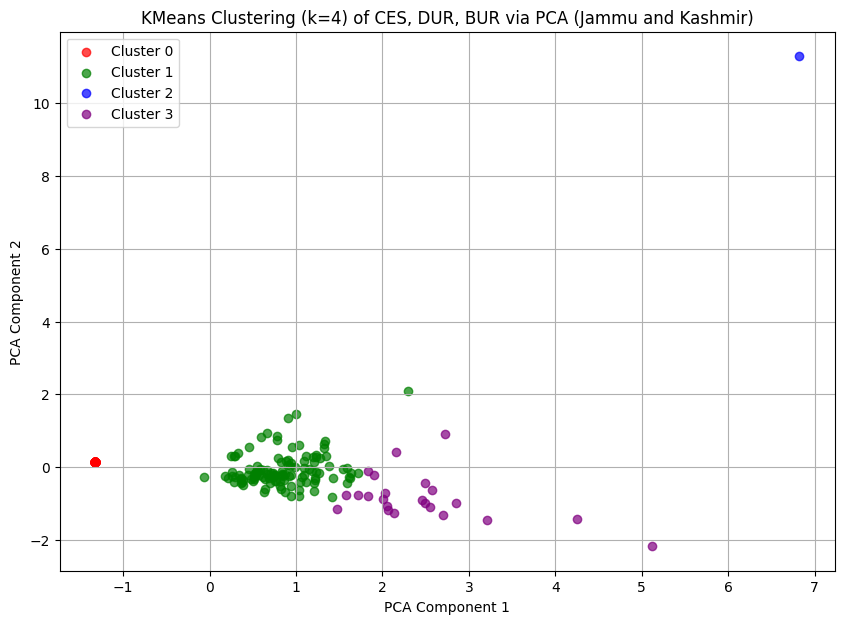

First 5 rows of df_jk_agg with 'clusterlabel' column:
   year  month              state   district  age_0_5  age_5_17  \
0  2025      3  Jammu and Kashmir   Anantnag      0.0       0.0   
1  2025      3  Jammu and Kashmir     Badgam      0.0       0.0   
2  2025      3  Jammu and Kashmir  Bandipore      0.0       0.0   
3  2025      3  Jammu and Kashmir   Baramula      0.0       0.0   
4  2025      3  Jammu and Kashmir     Budgam      0.0       0.0   

   age_18_greater  demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm  \
0             0.0          417.0        2782.0        2164.0  ...  0.239856   
1             0.0          288.0        3555.0         302.0  ...  0.064821   
2             0.0          333.0        1901.0         556.0  ...  0.072172   
3             0.0         1200.0        8391.0        4037.0  ...  0.507221   
4             0.0         1531.0        2692.0        2063.0  ...  0.139787   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURriskn

In [211]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_jk_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_jk_agg
df_jk_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_jk_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Jammu and Kashmir)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_jk_agg with 'clusterlabel' column:")
print(df_jk_agg.head())

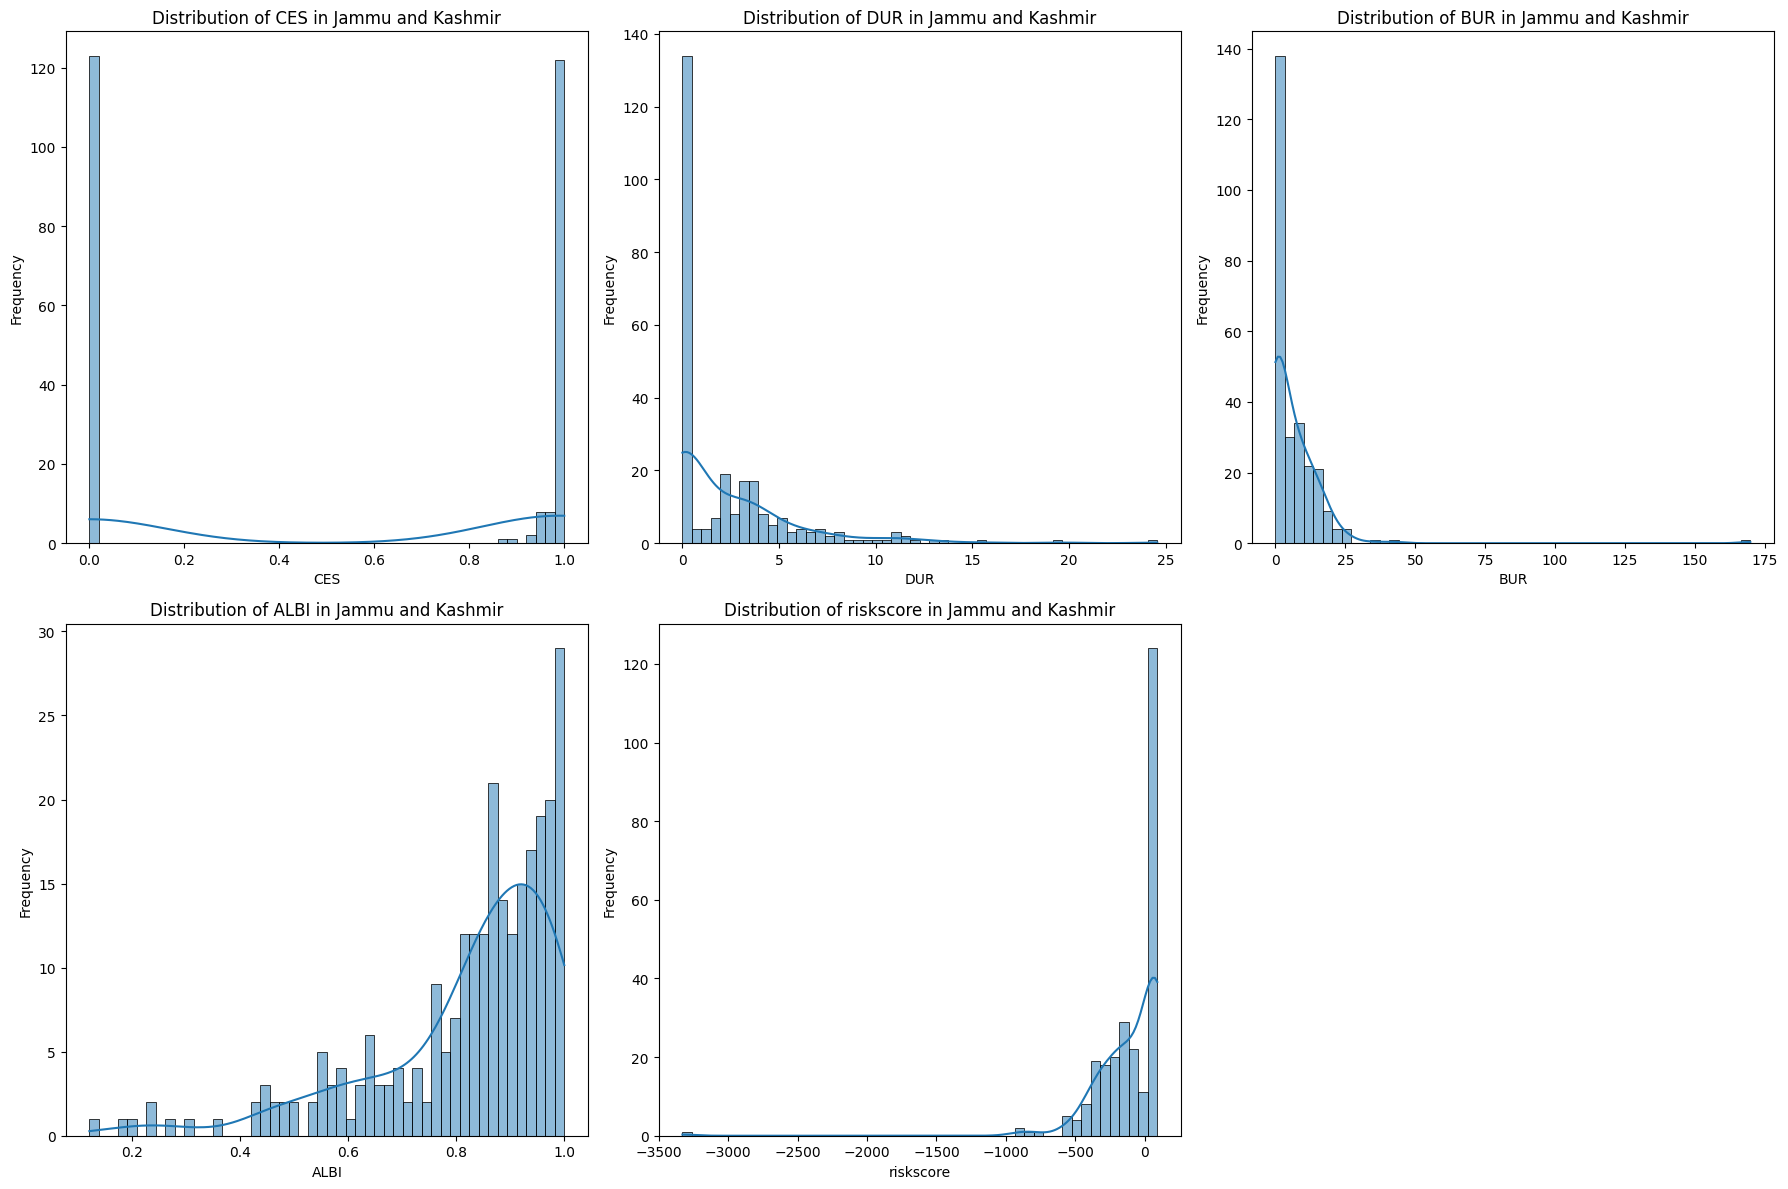

Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Jammu and Kashmir.


In [212]:
metrics_to_plot = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12))
for i, metric in enumerate(metrics_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_jk_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Jammu and Kashmir')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore displayed for Jammu and Kashmir.")

In [213]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_jk_agg['year'].max()
latest_month = df_jk_agg[df_jk_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_jk_agg for the latest year and month
df_latest_month = df_jk_agg[(df_jk_agg['year'] == latest_year) & (df_jk_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top 10 and bottom 10 districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top 10 districts
    top_10 = df_latest_month.sort_values(by=metric, ascending=False).head(10)
    print(f"\nTop 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_10[['district', metric]].to_string(index=False))

    # Bottom 10 districts
    bottom_10 = df_latest_month.sort_values(by=metric, ascending=True).head(10)
    print(f"\nBottom 10 Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_10[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top 10 Districts by CES (Year 2026, Month 1):
 district  CES
 Anantnag  1.0
   Badgam  1.0
   Budgam  1.0
Ganderbal  1.0
     Doda  1.0
   Kathua  1.0
   Kargil  1.0
 Udhampur  1.0
 Shupiyan  1.0
      Leh  1.0

Bottom 10 Districts by CES (Year 2026, Month 1):
 district      CES
    Jammu 0.980315
    Punch 0.987730
 Kishtwar 0.988764
Bandipore 0.993007
  Pulwama 0.993103
    Reasi 0.994186
 Baramula 0.995546
  Rajouri 0.995671
  Kupwara 0.997664
     Doda 1.000000

--- Metric: DUR ---

Top 10 Districts by DUR (Year 2026, Month 1):
district      DUR
     Leh 6.500000
Srinagar 4.596059
Shupiyan 3.634615
  Budgam 3.604167
 Pulwama 3.551724
   Samba 3.454545
Anantnag 3.059072
  Kulgam 3.038835
   Punch 2.435583
   Jammu 2.330709

Bottom 10 Districts by DUR (Year 2026, Month 1):
 district      DUR
    Reasi 0.901163
     Doda 1.125000
 Udhampur 1.185185
  Rajouri 1.376623
 Kishtwar 1.528090
   Ramban 1.657407
   Kathua 1.730

## Summary:

### Q&A
The analysis for Jammu and Kashmir provides a comprehensive overview of Aadhaar lifecycle management, covering data integration, metric calculation, trend analysis, district performance, and anomaly detection.

### Data Analysis Key Findings
*   **Data Integration and Metrics**: Three datasets (Enrolment, Demographic, Biometric) for Jammu and Kashmir were loaded, converted to datetime format, and outer-merged into a single DataFrame (`df_merged_jk`) of 59,212 rows and 11 columns, with missing numerical values filled with 0. Key metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, `totalbioupdates`, `CES`, `DUR`, `BUR`, `Enorm`, `Dnorm`, `Bnorm`, `stdnorm`, `ALBI`, and `riskscore` were successfully calculated.
*   **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates revealed monthly fluctuations, indicating varying activity levels over time.
*   **Correlation Analysis**: A strong positive correlation (0.83) was observed between `bio_age_5_17` and `bio_age_17_`. Generally, strong correlations were found within enrolment and update categories, while correlations between enrolment and update figures were weaker.
*   **Clustering Analysis**: KMeans clustering (k=4) on `CES`, `DUR`, and `BUR` metrics identified distinct performance profiles among districts, visualized effectively through PCA.
*   **District Performance (Latest Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: Many districts (e.g., Anantnag, Badgam, Budgam, Ganderbal, Doda, Kathua, Kargil, Udhampur, Shupiyan, Leh) achieved a perfect score of 1.0, while Jammu recorded the lowest at 0.98.
    *   **DUR (Demographic Update Rate)**: Leh (6.50) and Srinagar (4.59) had the highest rates, whereas Reasi (0.90) and Doda (1.12) recorded the lowest.
    *   **BUR (Biometric Update Rate)**: Leh (14.00) and Srinagar (7.88) showed the highest rates, while Badgam (1.47) and Ramban (1.65) were among the lowest.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Leh (0.997) and Kargil (0.98) exhibited the best balance, contrasting with Baramula (0.12) and Kupwara (0.17) which had the lowest balance.
    *   **Risk Score Anomaly**: Consistent with other states, numerous districts, including Reasi (\$-6.73\$), Ramban (\$-7.73\$), Doda (\$-8.25\$), Leh (\$-349.94\$), and Srinagar (\$-182.72\$), displayed negative risk scores, indicating a persistent issue with the metric's calculation or interpretation.

### Insights or Next Steps
*   Investigate the widespread occurrence of negative `riskscore` values across multiple districts, as this suggests a fundamental issue with the metric's definition or scaling that needs to be addressed to ensure its utility and actionability.
*   Focus on districts with low ALBI values (e.g., Baramula and Kupwara) to identify underlying reasons for imbalance between enrolment and update activities, potentially through targeted operational reviews or awareness campaigns.
